## ASTR 119 Final Project Option #3
## Astronomical Source Detection

### 6) f105w Image


#### In the following block, numpy is being imported as np. Also we imported sep


In [1]:
import numpy as np
import sep

#### Now, we imported fits from astropy, matplotlib.pyplot as usual, and rcParams.
#### Note that mathplotlib inline is used. as well as the array for the parameters "rcParams' is allocated


In [2]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

#### Now, we read the image from the data. and declare the list name hdu

In [3]:
# read image into standard 2-d numpy array
data = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
hdu_list = fits.open(data)

#### Here the array containing the image data is accessed for the first element.

In [4]:
image_data = hdu_list[0].data

#### The data is printed to see what size and the type

In [5]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(3600, 3600)


#### Now, we close the access.

In [6]:
hdu_list.close()

#### In the following block, the array is filled with the data from thee file. and printed

In [7]:
image_data = fits.getdata(data)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(3600, 3600)


### The original image is printed with some basic adjustments. 

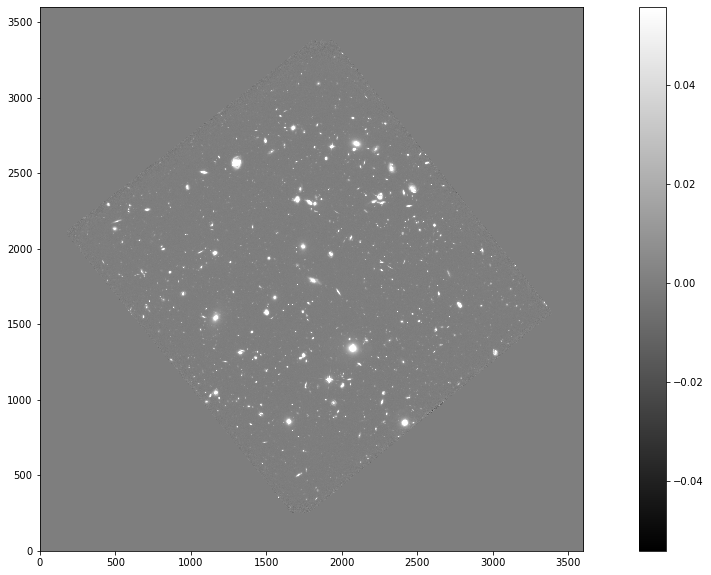

In [8]:
# show the image
fig = plt.figure(figsize=(20,10))
m, s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
fig.savefig("FirstImage.png", bbox_inches='tight', dpi=150)

#### Using sep to get the bakground that varies from the image

In [9]:
# measure a spatially varying background on the image
image_data = image_data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(image_data)

#### Alternatively one can set the following

In [10]:
#bkg = sep.Background(image_data, mask=None, bw=64, bh=64, fw=3, fh=3)

#### Now, we get the noise with sep and print it.

In [11]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


#### Conversion to 2-d array.

In [12]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

#### Print the background and save the image.

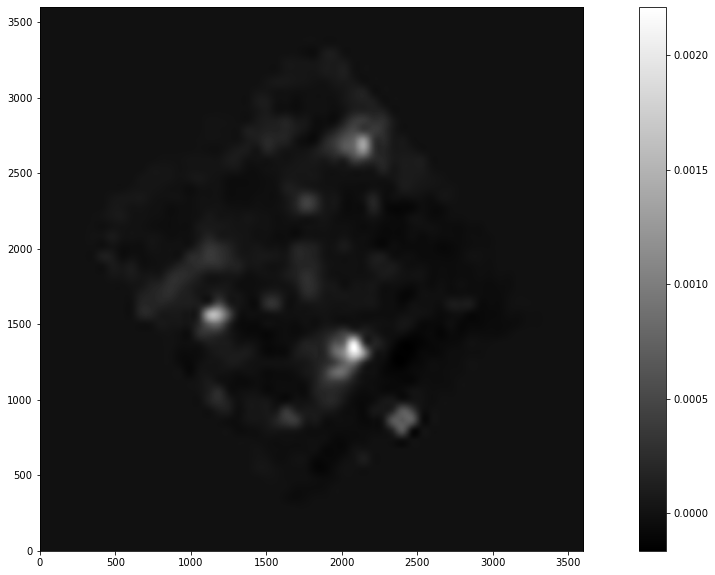

In [13]:
# show the background
fig = plt.figure(figsize=(20,10))
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
fig.savefig("SecondImage.png", bbox_inches='tight', dpi=450)

#### Conversion to 2-d array.

In [14]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

#### Print the noise and save the image.

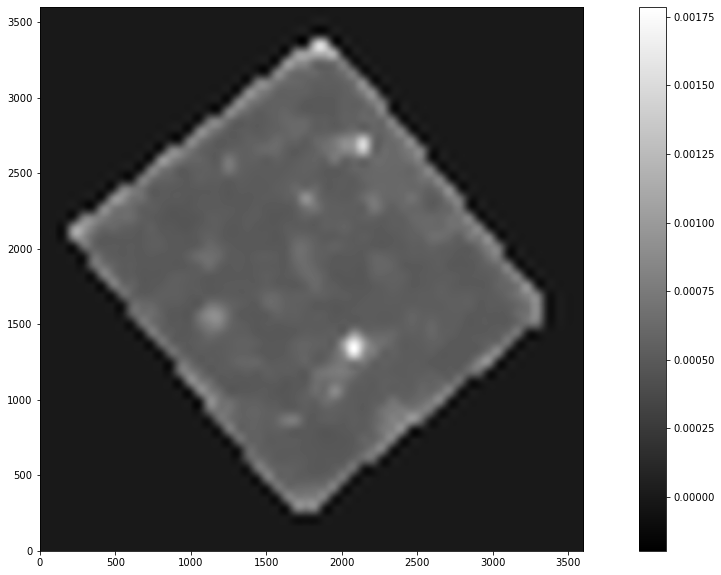

In [15]:
# show the background noise
fig = plt.figure(figsize=(20,10))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
fig.savefig("ThirdImage.png", bbox_inches='tight', dpi=150)

#### Now, the background is subtracted from the original image data.

In [16]:
# subtract the background
data_sub = image_data - bkg

#### Setting up objects to measure the variation ob changee in colors. 

In [17]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

#### Showing how many objects were detected

In [18]:
# how many objects were detected
len(objects)

8645

#### Printing and saving final image. Note, that the red ellipses were printed sourranding the objects detected using "Ellipse" from the matplotlib.patches module. 

<Figure size 1440x720 with 0 Axes>

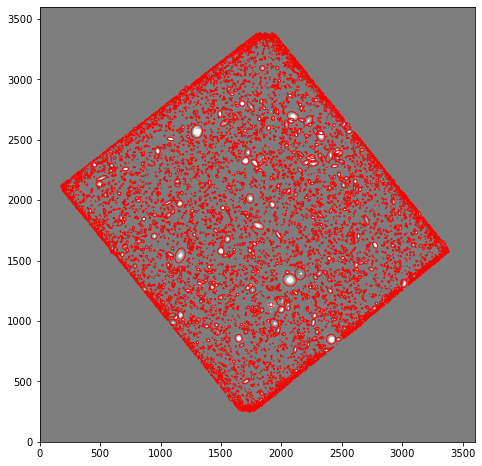

In [43]:
from matplotlib.patches import Ellipse

fig = plt.figure(figsize=(20,10))
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

fig.savefig("FourthImage.png", bbox_inches='tight', dpi=150)

#### List of different fields we can have access to:

In [20]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

#### Declaring a 3 pixel radius at the location of the objects making a simple circular aperture photometry. 

In [21]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

#### Doing the actual photometry and printing the results for 10 objects.  In AB Magnitude. 

In [47]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: mAB = {:f} +/- {:f}".format(i, -2.5*np.log10(flux[i]) + 8.90, -2.5*np.log10(fluxerr[i]) + 8.90))

object 0: mAB = 12.661765 +/- 10.780740
object 1: mAB = 12.670969 +/- 10.785341
object 2: mAB = nan +/- 15.250437
object 3: mAB = 15.676554 +/- 12.285978
object 4: mAB = 13.661444 +/- 11.280363
object 5: mAB = nan +/- 15.253491
object 6: mAB = 12.730331 +/- 10.815013
object 7: mAB = nan +/- 15.253491
object 8: mAB = 12.196372 +/- 10.548093
object 9: mAB = 12.788339 +/- 10.844009


<ipython-input-47-46e8f08f16d2>:3: RuntimeWarning: invalid value encountered in log10
  print("object {:d}: mAB = {:f} +/- {:f}".format(i, -2.5*np.log10(flux[i]) + 8.90, -2.5*np.log10(fluxerr[i]) + 8.90))


### Check Files to see images

### 7)  UDF using RGB


In [31]:
from astropy.io import fits
hdulist = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
image1 = hdulist[0]
image1.data.shape
print(image1.shape)
image1.data = np.random.random((512,512))
print(image1.shape)

(3600, 3600)
(512, 512)


In [32]:
hdulist = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_wht.fits")
image2 = hdulist[0]
image2.data.shape
print(image2.shape)
image2.data = np.random.random((512,512))
print(image2.shape)

(3600, 3600)
(512, 512)


In [33]:
hdulist = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")
image3 = hdulist[0]
image3.data.shape
print(image3.shape)
image3.data = np.random.random((512,512))
print(image3.shape)

(3600, 3600)
(512, 512)


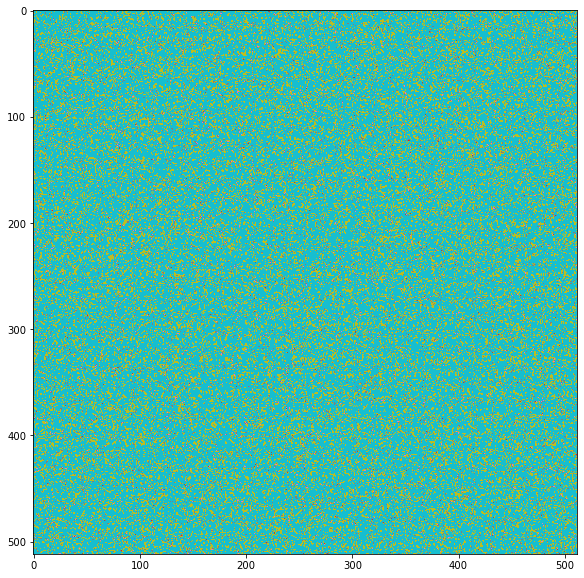

In [114]:
image1.data_log = np.log10(image1.data)
f = plt.figure(figsize=(10,10))
plt.imshow(image1.data_log, cmap = "tab10")

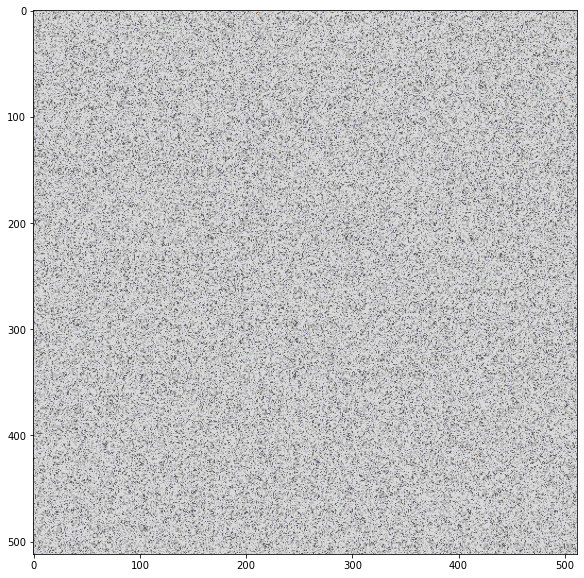

In [115]:
image2.data_log = np.log10(image2.data)
f = plt.figure(figsize=(10,10))
plt.imshow(image2.data_log, cmap = "tab20c")

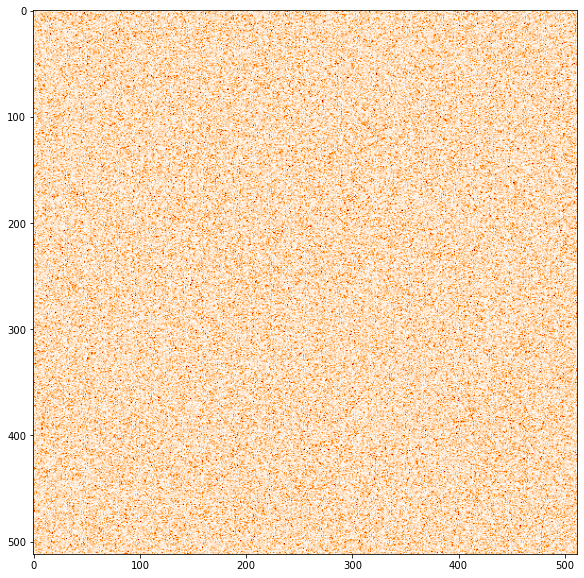

In [116]:
image3.data_log = np.log10(image3.data)
f = plt.figure(figsize=(10,10))
plt.imshow(image3.data_log, cmap = "gist_heat")

#### Making a 3-color image

In [117]:
image1.data_min = image1.data_log.min()
image1.data_max = image1.data_log.max()

v = (image1.data_log - image1.data_min)/(image1.data_max - image1.data_min)
#s = 1.0 - v

In [135]:
image2.data_min = image2.data_log.min()
image2.data_max = image2.data_log.max()
h = 0. + 0.6*(image2.data_log - image2.data_min)/(image2.data_max - image2.data_min)

In [136]:
image3.data_min = image3.data_log.min()
image3.data_max = image3.data_log.max()
s = 0. + 0.5*(image3.data_log - image3.data_min)/(image3.data_max - image3.data_min)

In [137]:
print(h.shape)
print(s.shape)
print(v.shape)

(512, 512)
(512, 512)
(512, 512)


In [138]:
hsv_image = np.zeros((512,512,3))

hsv_image[:,:,0] = h
hsv_image[:,:,1] = s
hsv_image[:,:,2] = v

rgb_image = colors.hsv_to_rgb(hsv_image)

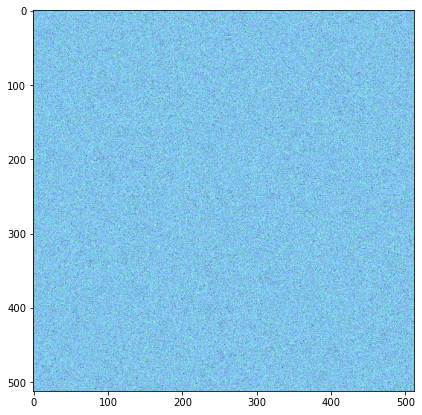

In [140]:
f = plt.figure(figsize=(7,7))
plt.imshow(rgb_image)
plt.imsave("Final Product.png",rgb_image)